In [2]:
#Liner Regression (Supervised Learning)
import numpy as np
import pandas as pd
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df= pd.read_csv("ScoresPrediction.csv",na_values= ["??","???","##"])
df.head(10)

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
0,5,6,2,0,6,6
1,5,5,2,0,4,6
2,7,8,2,3,10,10
3,15,14,3,0,2,15
4,6,10,2,0,4,10
5,15,15,2,0,10,15
6,12,12,2,0,0,11
7,6,5,2,0,6,6
8,16,18,2,0,0,19
9,14,15,2,0,0,15


In [4]:
df.shape

(395, 6)

In [5]:
df.isnull().any()

FirstYrScore     False
SecondYrScore    False
StudyTime        False
Failures         False
Absences         False
FinalYrScore     False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   FirstYrScore   395 non-null    int64
 1   SecondYrScore  395 non-null    int64
 2   StudyTime      395 non-null    int64
 3   Failures       395 non-null    int64
 4   Absences       395 non-null    int64
 5   FinalYrScore   395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [7]:
np.unique(df["FirstYrScore"])

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [8]:
df.describe()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,2.035443,0.334177,5.708861,10.415190
std,3.319195,3.761505,0.839240,0.743651,8.003096,4.581443
min,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,9.000000,1.000000,0.000000,0.000000,8.000000
50%,11.000000,11.000000,2.000000,0.000000,4.000000,11.000000
75%,13.000000,13.000000,2.000000,0.000000,8.000000,14.000000
max,19.000000,19.000000,4.000000,3.000000,75.000000,20.000000


In [9]:
# prediction = df["FinalYrScore"]
# features = df[['FirstYrScore', 'SecondYrScore', 'StudyTime', 'Failures', 'Absences']]

prediction = df.iloc[:,-1]
features = df.iloc[:,:-1]

x_train,x_test,y_train,y_test = train_test_split(features, prediction, random_state = 30, test_size= 0.2, shuffle= True)

In [10]:
prediction.head()


0     6
1     6
2    10
3    15
4    10
Name: FinalYrScore, dtype: int64

In [11]:
features.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences
0,5,6,2,0,6
1,5,5,2,0,4
2,7,8,2,3,10
3,15,14,3,0,2
4,6,10,2,0,4


In [12]:
df_train= pd.concat([x_train,y_train], axis=1)
df_train.tail()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
309,12,10,2,1,18,10
386,6,5,1,0,7,6
140,7,9,4,0,0,0
301,11,11,1,0,0,10
293,18,18,4,0,6,18


In [13]:
corr_train_data = df_train.corr(method="pearson")
print(corr_train_data)

               FirstYrScore  SecondYrScore  StudyTime  Failures  Absences  \
FirstYrScore       1.000000       0.842820   0.146841 -0.343465 -0.034263   
SecondYrScore      0.842820       1.000000   0.131520 -0.350217 -0.033491   
StudyTime          0.146841       0.131520   1.000000 -0.148841 -0.030737   
Failures          -0.343465      -0.350217  -0.148841  1.000000  0.119474   
Absences          -0.034263      -0.033491  -0.030737  0.119474  1.000000   
FinalYrScore       0.805775       0.917097   0.092127 -0.357278  0.038255   

               FinalYrScore  
FirstYrScore       0.805775  
SecondYrScore      0.917097  
StudyTime          0.092127  
Failures          -0.357278  
Absences           0.038255  
FinalYrScore       1.000000  


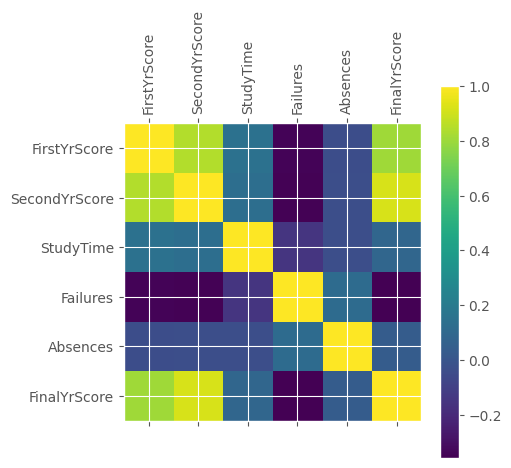

In [14]:
plt.style.use("ggplot")
plt.matshow(corr_train_data)
plt.xticks(range(0,len(corr_train_data),1),corr_train_data,rotation= 90)
plt.yticks(range(len(corr_train_data)),corr_train_data)
plt.colorbar()
plt.show()

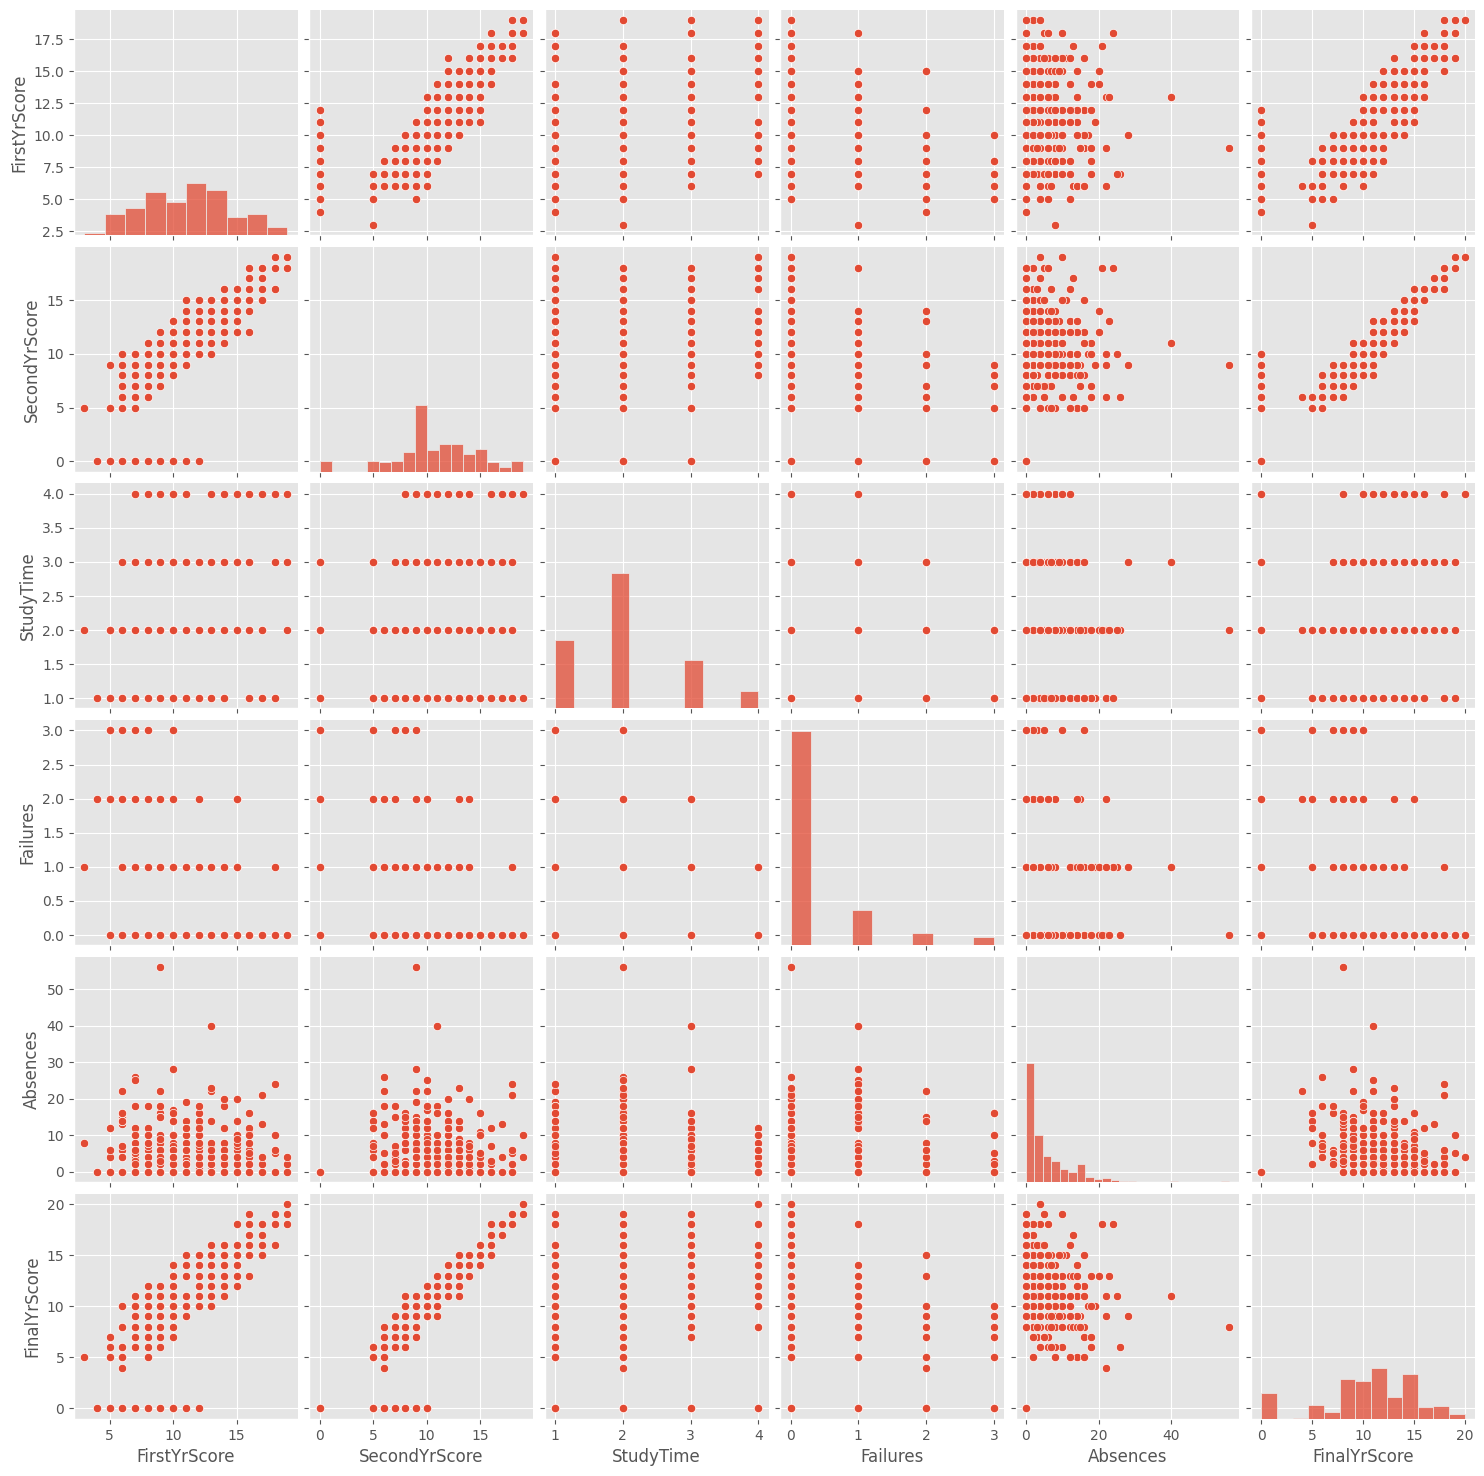

In [15]:
plt.style.use("ggplot")
sns.pairplot(df_train, kind= "scatter")
plt.show()

In [16]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train=  mean_squared_error(y_train,y_pred_train)
mae_train= mean_absolute_error(y_train,y_pred_train)
r2_score_train= r2_score(y_train,y_pred_train)

print("mse_train : ", mse_train)
print("mae_train : ", mae_train)
print("r2_score_train : ", r2_score_train)

mse_train :  3.125560891760997
mae_train :  1.0612531572838844
r2_score_train :  0.8525974611888293


In [18]:
mse_test=  mean_squared_error(y_test,y_pred)
mae_test= mean_absolute_error(y_test,y_pred)
r2_score_test= r2_score(y_test,y_pred)

print("mse_test : ", mse_test)
print("mae_test : " ,mae_test)
print("r2_score_test : ", r2_score_test)

mse_test :  5.513762214121058
mae_test :  1.5346156083030993
r2_score_test :  0.7181658177993946
